   Density  BodyFat   Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0   1.0708     12.3  23.0  154.25   67.75     3   93.1     85.2  90.0   59.0   
1   1.0578     18.0  43.0  165.50   68.50     4   93.1     87.3  91.0   54.7   
2   1.0814      7.7  39.0  125.25   68.00     5   85.1     76.0  92.0   50.0   
3   1.0678     13.6  45.0  135.75   68.50     6   92.3     83.4  93.0   52.0   
4   1.0680     13.5  55.0  125.00   64.00     7   87.7     76.0  94.0   50.9   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   16.0  
1  39.0   24.8    31.0     29.4   17.0  
2  34.7   21.0    26.1     23.1   18.0  
3  35.8   20.6    28.8     25.5   19.0  
4  35.4   19.1    29.3     25.7   20.0  
          Density     BodyFat         Age      Weight     Height        Neck  \
count  219.000000  219.000000  219.000000  219.000000  219.00000  219.000000   
mean     1.057783   18.081735   44.515982  172.609817   69.94863  112.000000   
std      0.017763    7.838147   1

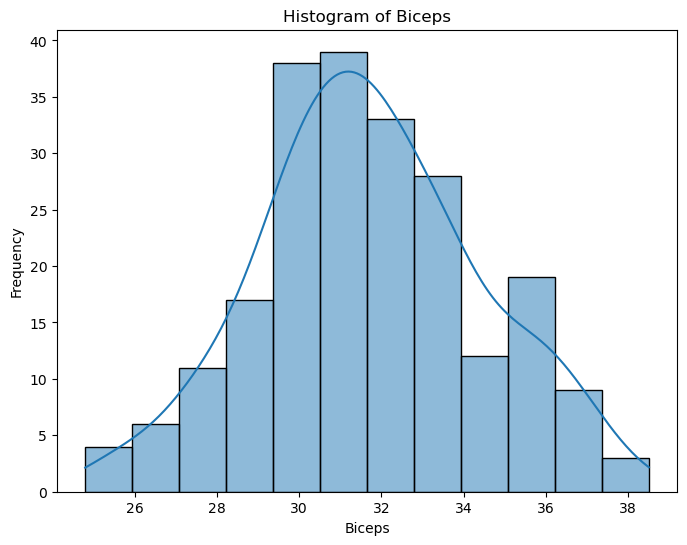

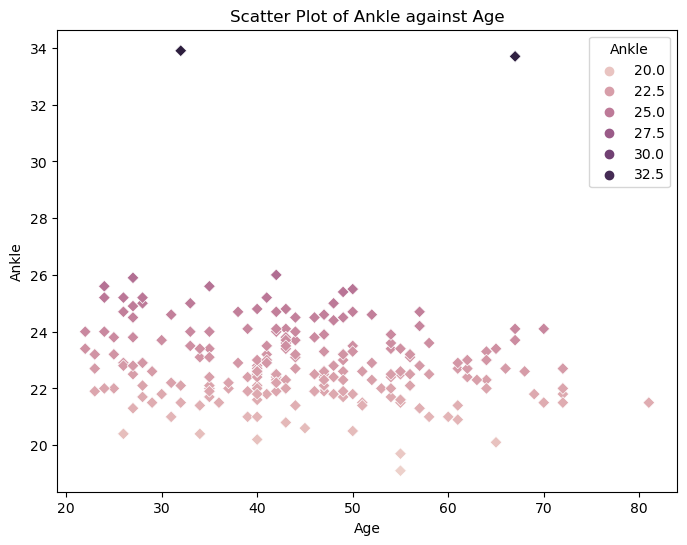

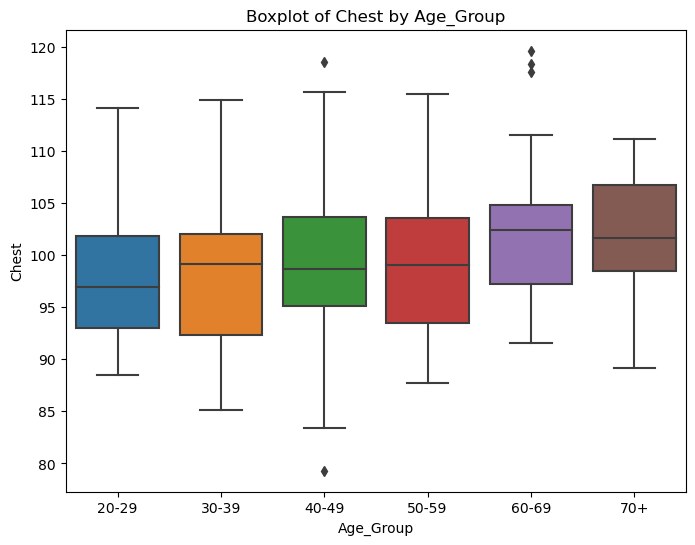

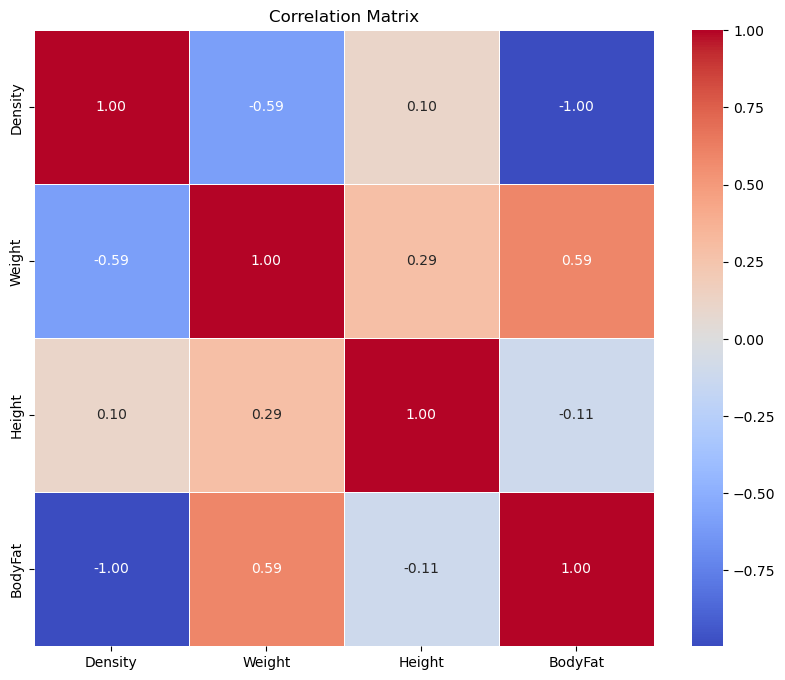

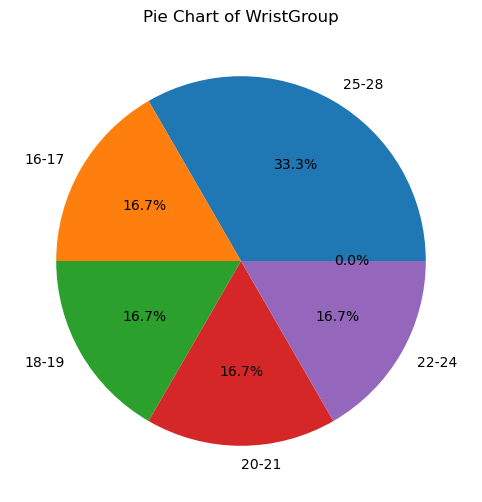

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataframe = pd.read_csv('bodyfat.csv')
print(dataframe.head())
    
dataframe.dropna(inplace=True)
print(dataframe.describe())

def create_histogram(dataframe, column):
    """
    Create a histogram for a specific column in a DataFrame.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    column (str): The column name for which to create the histogram.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataframe, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def create_boxplot(dataframe, x_column, y_column):
    """
    Create a boxplot to visualize the distribution of a numeric column across different categories.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    x_column (str): The column name to represent the categories on the x-axis.
    y_column (str): The column name to represent the numeric data on the y-axis.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataframe, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def create_scatterplot(dataframe, x_column, y_column, hue=None):
    """
    Create a scatter plot to visualize the relationship between two numeric columns.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    hue (str, optional): The column name to color the data points by. Defaults to None.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=dataframe, x=x_column, y=y_column, hue=hue, marker ='D')
    plt.title(f'Scatter Plot of {y_column} against {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend(title=hue) 
    plt.show()

def calculate_correlation(dataframe):
    """
    Calculate and visualize the correlation matrix for numeric columns in a DataFrame.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.
    """
    corr_matrix = dataframe.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

def create_pie_chart(a):
    """
    Create a pie chart to visualize the distribution of categories.

    Parameters:
    a (Series): A pandas Series containing the category counts.
    """
    plt.figure(figsize=(8, 6))
    a.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Pie Chart of WristGroup')
    plt.ylabel('')
    plt.show()

# Create histogram
create_histogram(dataframe, 'Biceps')

# Create scatter plot
create_scatterplot(dataframe, 'Age', 'Ankle', hue='Ankle')

# Create boxplot
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
dataframe['Age_Group'] = pd.cut(dataframe['Age'], bins=age_bins, labels=age_labels, right=False)
create_boxplot(dataframe, 'Age_Group', 'Chest')

# Calculate and visualize correlation matrix
calculate_correlation(dataframe[['Density', 'Weight', 'Height', 'BodyFat']])

# Create pie chart
wrist_bins = [14, 16, 18, 20, 22, 24, 28]
wrist_labels = ['14-15', '16-17', '18-19', '20-21', '22-24', '25-28']
dataframe['Wrist_Group'] = pd.cut(dataframe['Wrist'], bins=wrist_bins, labels=wrist_labels, right=False)
wrist_counts = dataframe['Wrist_Group'].value_counts()
create_pie_chart(wrist_counts)
